## 📈🧾 Predicción del tratamiento farmacológico óptimo mediante la clasificación de árboles de decisión 💊🧑🏼‍⚕️

### Georgina Casillas Rosano

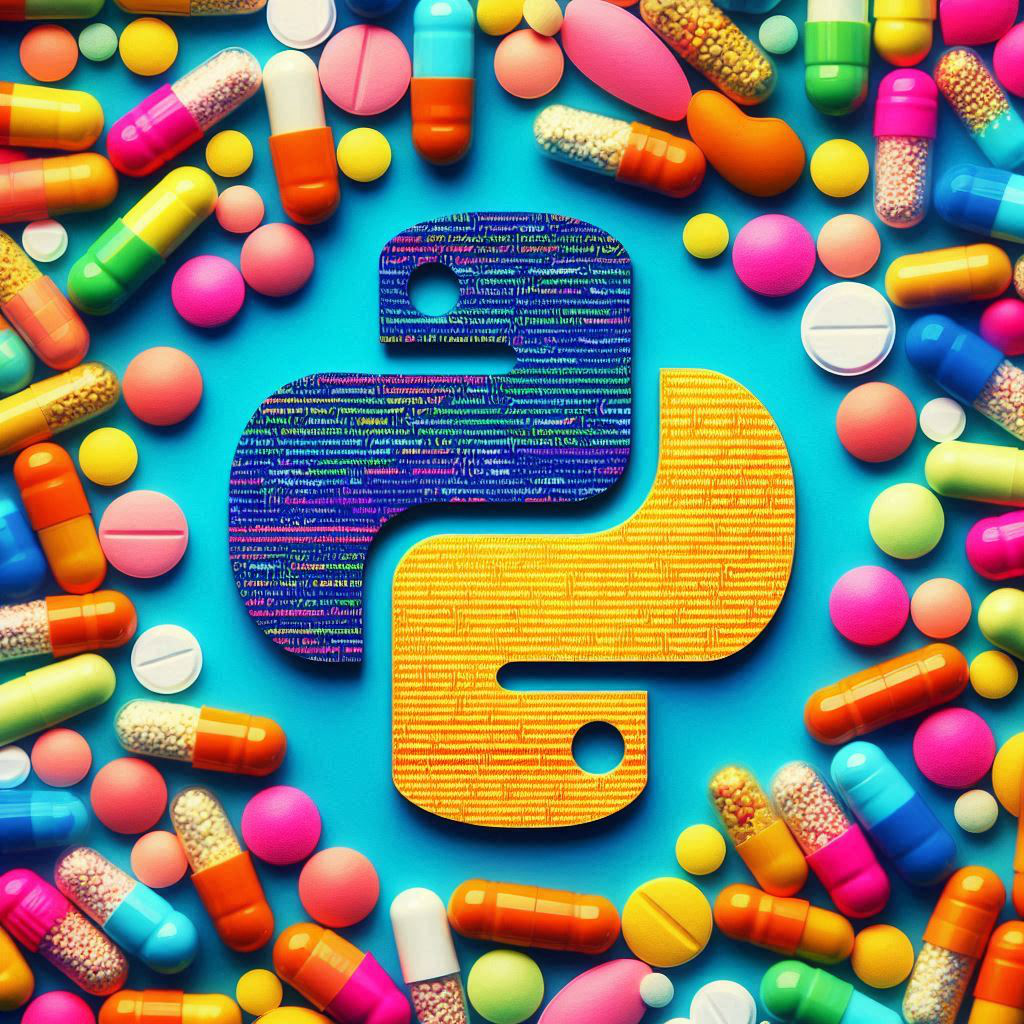

In [133]:
from PIL import Image

# creating a object
im = Image.open('D:/Gina/Downloads/Designer.jpeg') 

im #para imprimir imagen en siguiente renglon

### Importar librerías

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Importar datos

In [5]:
import os
# Cambiar el directorio a la ubicación correcta
os.chdir("D:/Gina/Documentos/EBAC") 

In [7]:
datos = pd.read_csv("drugs.csv")
datos

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [9]:
datos.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

## Preprocesamiento de datos 

In [12]:
# Cambiar las variables de cadenas a numéricas.

#Cambiar la columna "Drug" de categórica a numérica
mapping = {'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}        
datos['Drug'] = datos['Drug'].map(mapping)

#Cambiar la columna "BP" de categórica a numérica
mapping = {'LOW': 1,'NORMAL': 2, 'HIGH': 3}
datos['BP'] = datos['BP'].map(mapping)

#Cambiar la columna Sex de categórica a numérica
mapping = {'F': 0,'M': 1}
datos['Sex'] = datos['Sex'].map(mapping)

# Cambiar la columna 'Cholesterol' de categórica a numérica
mapping = {'NORMAL': 0,'HIGH': 1}
datos['Cholesterol'] = datos['Cholesterol'].map(mapping)

# Mostrar el resultado
print(datos)

     Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    0   3            1   25.355     4
1     47    1   1            1   13.093     2
2     47    1   1            1   10.114     2
3     28    0   2            1    7.798     3
4     61    0   1            1   18.043     4
..   ...  ...  ..          ...      ...   ...
195   56    0   1            1   11.567     2
196   16    1   1            1   12.006     2
197   52    1   2            1    9.894     3
198   23    1   2            0   14.020     3
199   40    0   1            0   11.349     3

[200 rows x 6 columns]


In [14]:
datos.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug             int64
dtype: object

## Análisis Exploratorio de Datos

### Balance del dataset

El dataset no se encuentra balanceado, los fármacos tienen diferentes números de datos.

In [18]:
# Numero de observaciones por categoría ("drug")
print("\nNúmero de observaciones por tipo de Fármaco: \n", datos['Drug'].value_counts())


Número de observaciones por tipo de Fármaco: 
 Drug
4    91
3    54
0    23
2    16
1    16
Name: count, dtype: int64


### Comprobación de valores faltantes

El dataset está completo y no cuenta con valores faltantes.

In [21]:
datos.isnull().sum(axis=0)

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### Estadísticas Descriptivas

In [24]:
print("\nEstadísticas Descriptivas: \n", datos.describe())


Estadísticas Descriptivas: 
               Age         Sex          BP  Cholesterol     Na_to_K        Drug
count  200.000000  200.000000  200.000000   200.000000  200.000000  200.000000
mean    44.315000    0.520000    2.065000     0.515000   16.084485    2.870000
std     16.544315    0.500854    0.839224     0.501029    7.223956    1.372047
min     15.000000    0.000000    1.000000     0.000000    6.269000    0.000000
25%     31.000000    0.000000    1.000000     0.000000   10.445500    2.000000
50%     45.000000    1.000000    2.000000     1.000000   13.936500    3.000000
75%     58.000000    1.000000    3.000000     1.000000   19.380000    4.000000
max     74.000000    1.000000    3.000000     1.000000   38.247000    4.000000


### Estimación de la asimetría (Skewness)
Una distribución con asimetría positiva (valores positivos más destacados en la forma de onda) tendrá una “cola” más larga a la derecha de la media.

Una distribución con asimetría negativa (valores negativos más destacados en la forma de onda) tendrá una “cola” más larga a la izquierda de la media. 

In [27]:
datos.drop('Drug', axis=1).skew()

Age            0.030308
Sex           -0.080670
BP            -0.123536
Cholesterol   -0.060482
Na_to_K        1.039341
dtype: float64

### Estimación de Curtosis 
La curtosis caracteriza la elevación o el achatamiento relativo de una distribución, comparada con la distribución normal.
Una curtosis positiva ➕ indica una distribución relativamente elevada. Una curtosis negativa ➖ indica una distribución relativamente plana.

In [30]:
datos.drop('Drug', axis=1).kurt()

Age           -1.087938
Sex           -2.013731
BP            -1.571703
Cholesterol   -2.016610
Na_to_K        0.379979
dtype: float64

### Edad de los pacientes

🔵 Boxplot: La mediana parece estar alrededor de los 40-50 años.No hay valores atípicos evidentes, lo que indica que la distribución es bastante uniforme sin valores extremos.

🔵 Histograma: La distribución es bastante uniforme con un ligero pico alrededor de los 20-40 años, lo que indica que hay más pacientes en este rango de edad. No parece haber una fuerte asimetría, ya que los datos se distribuyen relativamente de manera equitativa entre los diferentes intervalos.

🔵 Estimación de Densidad de Kernel:Se observa una distribución con forma de campana pero sin una asimetría extrema.
Confirma que la mayoría de los pacientes tienen edades entre 20 y 60 años, con una densidad más alta en este rango.
La distribución parece unimodal (con un solo pico), lo que indica que no hay subgrupos claramente diferenciados en la muestra.

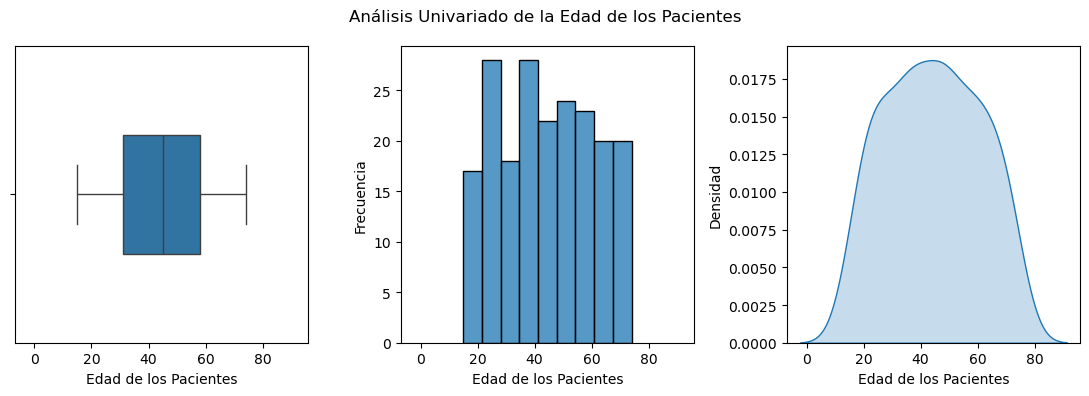

In [33]:
var = 'Age'
var_title = 'Edad de los Pacientes'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=datos[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=datos[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=datos[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

### Niveles de  iones Sodio y Potasio de los Pacientes
🔵 Boxplot: La mediana parece estar alrededor de 15. Existen valores atípicos, lo que indica que la distribución tiene valores extremos.

🔵 Histograma: La distribución con una asimetría positiva (skew = 1.039 hacia la izquierda) con un pico alrededor de 10-15, lo que indica que hay más pacientes con este valor de sales de sodio y potasio.

🔵 Estimación de Densidad de Kernel: Se observa una distribución con un sesgo a la izquierda lo cual la hace asimétrica. Confirma que la mayoría de los pacientes tienen valores de sodio y potasio entre 10 y 20 unidades, con una densidad más alta en este rango. La distribución parece unimodal (con un solo pico), lo que indica que no hay subgrupos claramente diferenciados en la muestra.


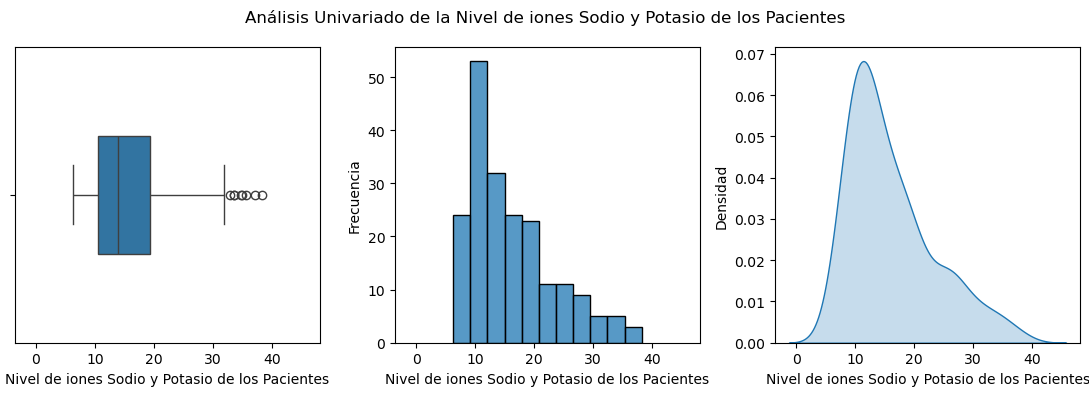

In [36]:
var = 'Na_to_K'
var_title = 'Nivel de iones Sodio y Potasio de los Pacientes'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=datos[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=datos[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=datos[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

### Gráfica de frecuencias para variables categóricas.

🔵 Frecuencia de Género: Ambas categorías tienen una cantidad similar de datos, lo que indica un balance en la muestra.

🔵 Frecuencia de BP (Presión Arterial): La categoría "3" (presión alta) tiene la mayor frecuencia, lo que podría indicar que más pacientes tienen presión arterial elevada en la muestra. Las categorías "1" y "2" tienen frecuencias similares.

🔵 Frecuencia de Cholesterol: Ambas categorías tienen frecuencias similares, indicando que no hay un sesgo fuerte en la muestra en cuanto al colesterol.

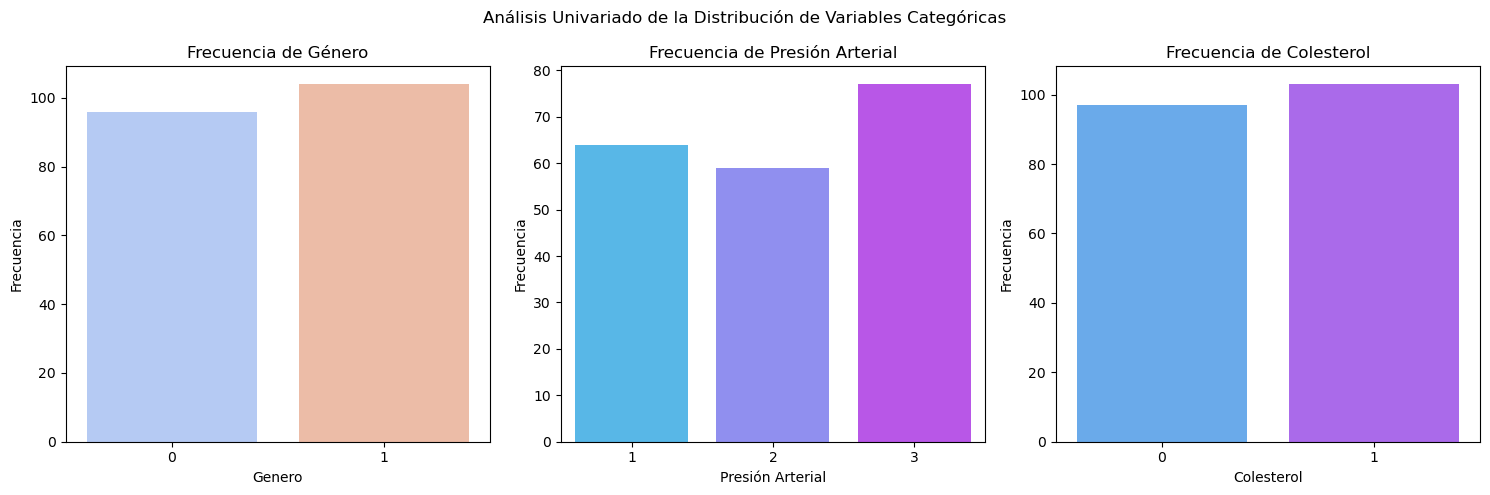

In [39]:
# Configuración de la figura
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico de barras para cada variable categórica
sns.countplot(x='Sex', data=datos, ax=axes[0], palette='coolwarm')
axes[0].set_title('Frecuencia de Género')

sns.countplot(x='BP', data=datos, ax=axes[1], palette='cool')
axes[1].set_title('Frecuencia de Presión Arterial')

sns.countplot(x='Cholesterol', data=datos, ax=axes[2], palette='cool')
axes[2].set_title('Frecuencia de Colesterol')

# Mejorar presentación
titles = ['Genero', 'Presión Arterial', 'Colesterol']
for ax, title in zip(axes, titles):
    ax.set_xlabel(title)
    ax.set_ylabel('Frecuencia')

plt.suptitle('Análisis Univariado de la Distribución de Variables Categóricas')
plt.tight_layout()
plt.show()

### Histogramas para cada fármaco y cada variable
A continuación se presentan los histogramas de cada variable desplegadas para cada especie. Lo que significa que es un matriz de 5x5.

Posteriormente se analizan cada una de las variables vs tipo de fármaco para una mejor comprensión.

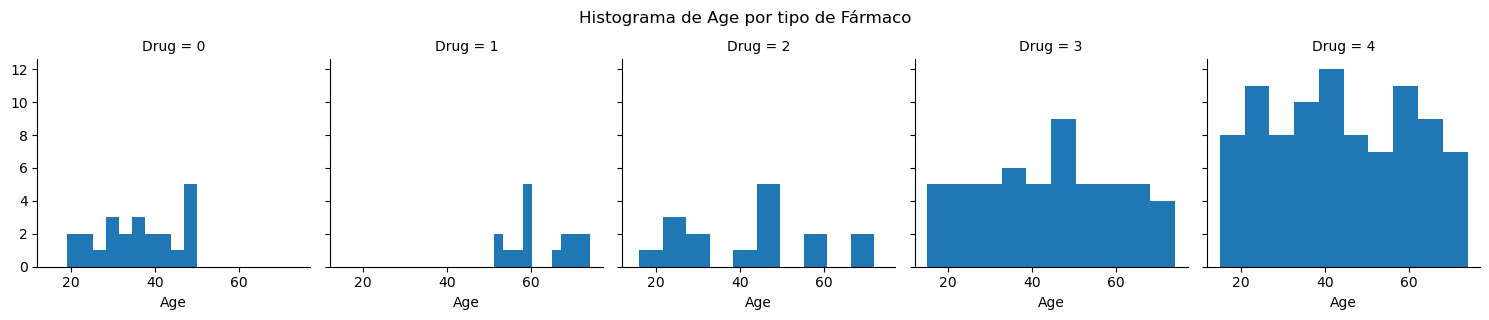

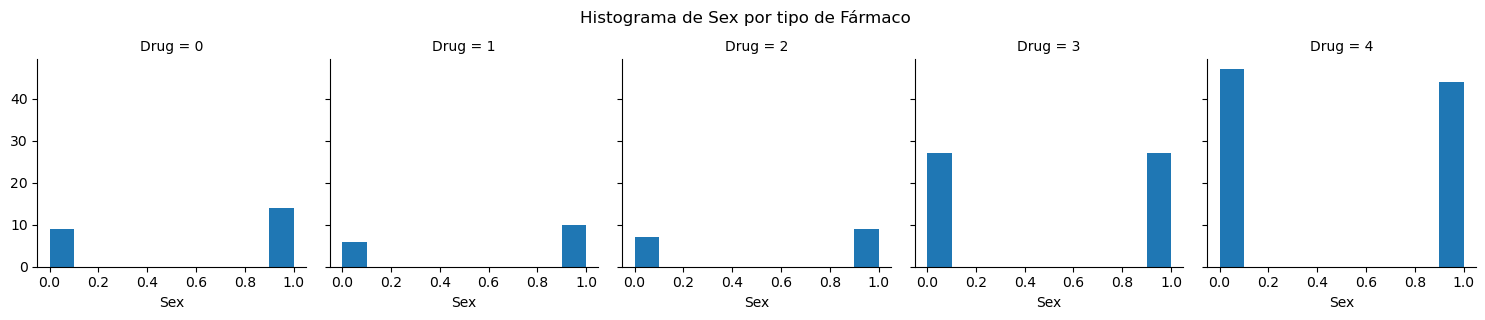

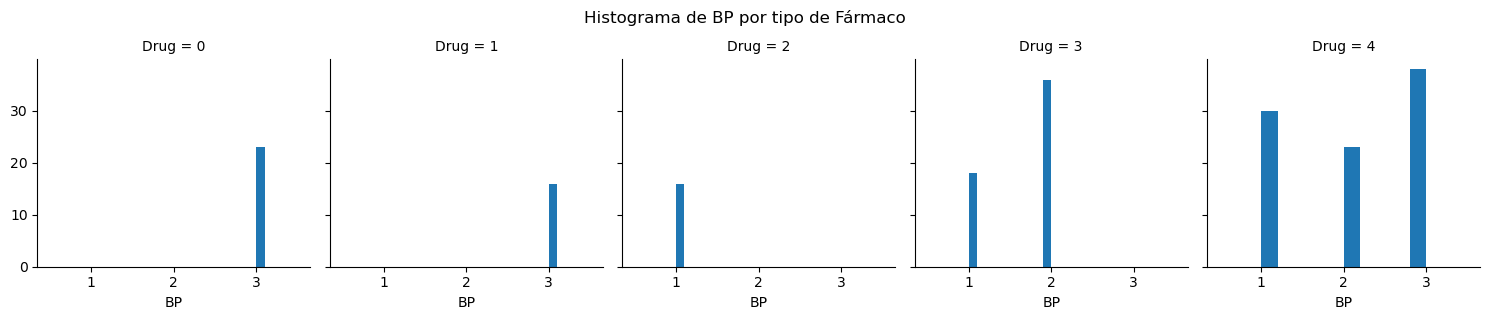

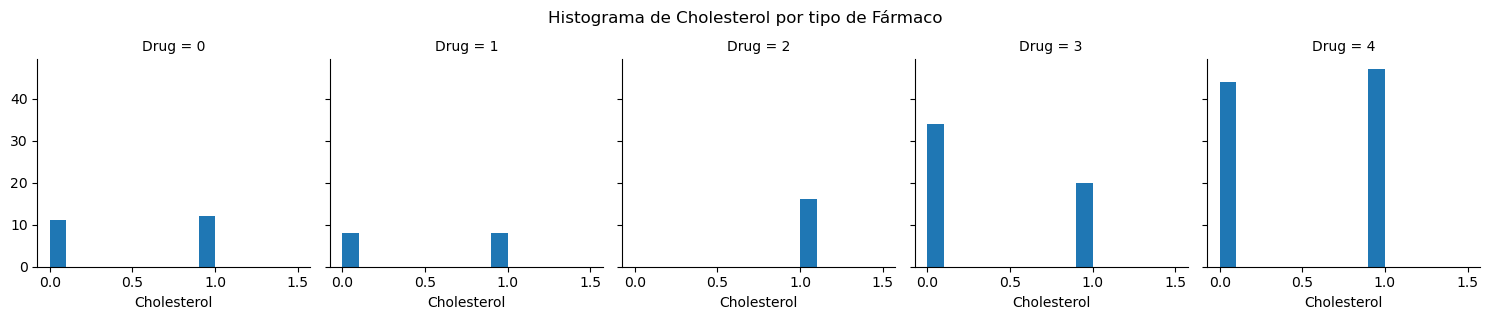

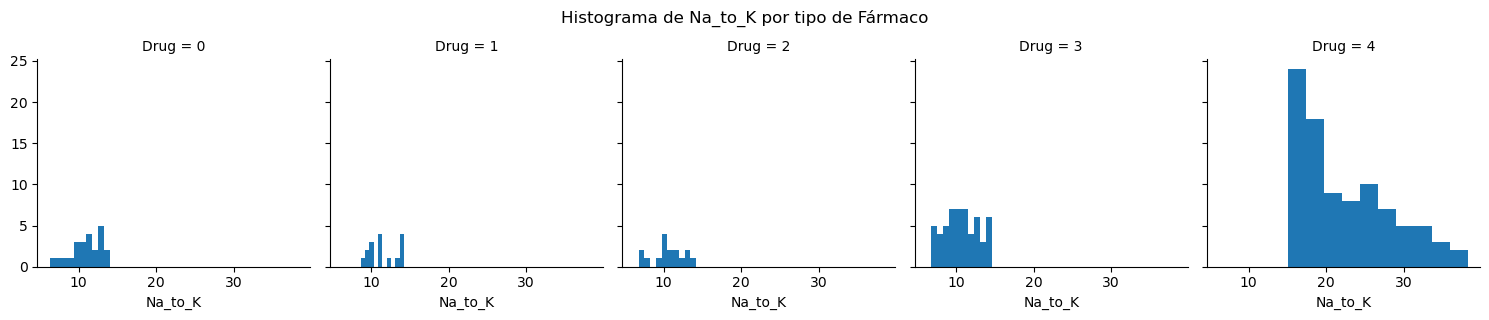

In [42]:
features = datos.columns[:-1]  # Todas las columnas excepto 'drug'
for feature in features:
    g = sns.FacetGrid(datos, col="Drug")
    g.map(plt.hist, feature)
    plt.suptitle(f"Histograma de {feature} por tipo de Fármaco", y=1.05)
    plt.show()

### Visualización de la matriz de correlación con heatmap

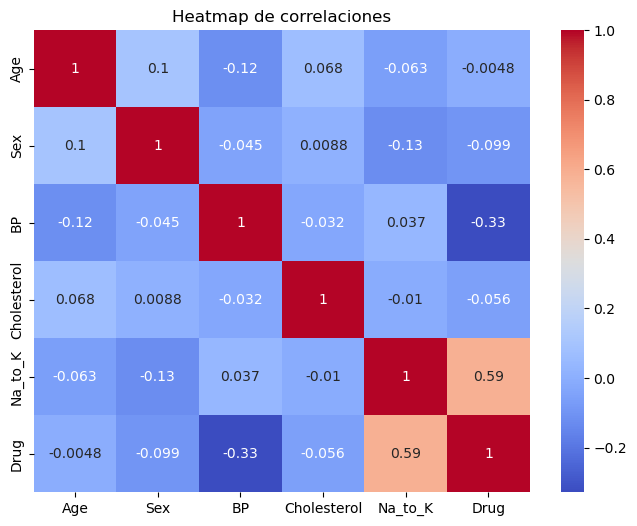

In [48]:
correlation_matrix = datos.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap de correlaciones")
plt.show()

🔵 Correlación (0.59) entre el tipo de fármaco y la cantidad de iones Na-K.

🔵 Correlación (0.33) entre el tipo de fármaco y el Colesterol.

Entonces, se observa correlaciones entre estos atributos principales: Tipo de fármaco, Cantidad de iones de Na-k y el Colesterol.

In [96]:
# Datos de medicamentos
A = datos[datos.Drug==0]
B = datos[datos.Drug==1]
C = datos[datos.Drug==2]
X = datos[datos.Drug==3]
Y = datos[datos.Drug==4]

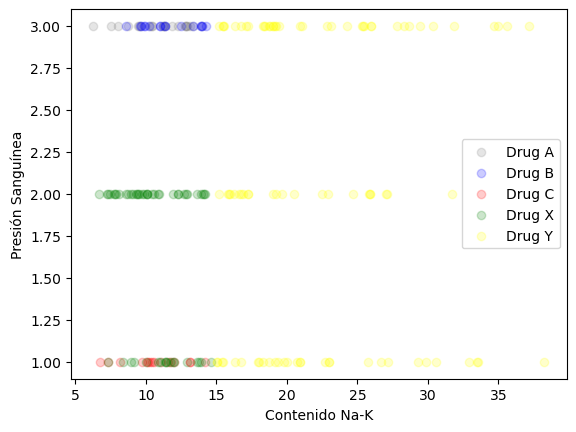

In [112]:
# Diagrama de dispersión
plt.scatter(A.Na_to_K, A.BP, color = "gray", label="Drug A", alpha=0.2)
plt.scatter(B.Na_to_K, B.BP, color = "blue", label="Drug B", alpha=0.2)
plt.scatter(C.Na_to_K, C.BP, color = "red", label="Drug C", alpha=0.2)
plt.scatter(X.Na_to_K, X.BP, color = "green", label="Drug X", alpha=0.2)
plt.scatter(Y.Na_to_K, Y.BP, color = "yellow", label="Drug Y", alpha=0.2)
plt.xlabel("Contenido Na-K")
plt.ylabel("Presión Sanguínea")
plt.legend()
plt.show()

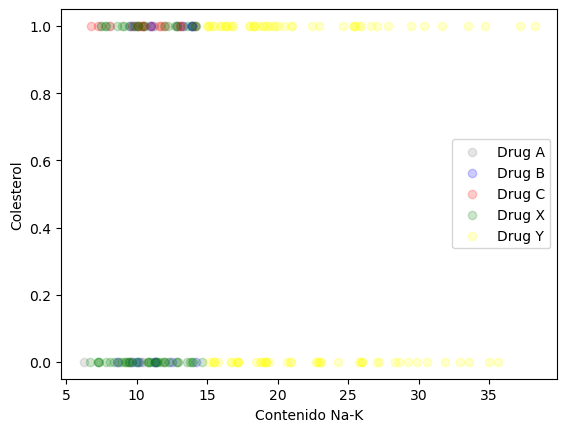

In [110]:
# Diagrama de dispersión
plt.scatter(A.Na_to_K, A.Cholesterol, color = "gray", label="Drug A", alpha=0.2)
plt.scatter(B.Na_to_K, B.Cholesterol, color = "blue", label="Drug B", alpha=0.2)
plt.scatter(C.Na_to_K, C.Cholesterol, color = "red", label="Drug C", alpha=0.2)
plt.scatter(X.Na_to_K, X.Cholesterol, color = "green", label="Drug X", alpha=0.2)
plt.scatter(Y.Na_to_K, Y.Cholesterol, color = "yellow", label="Drug Y", alpha=0.2)
plt.xlabel("Contenido Na-K")
plt.ylabel("Colesterol")
plt.legend()
plt.show()

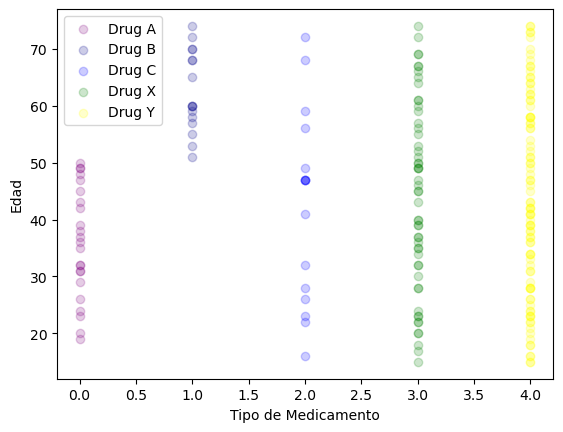

In [130]:
# Diagrama de dispersión
plt.scatter(A.Drug, A.Age, color = "purple", label="Drug A", alpha=0.2)
plt.scatter(B.Drug, B.Age, color = "darkblue", label="Drug B", alpha=0.2)
plt.scatter(C.Drug, C.Age, color = "blue", label="Drug C", alpha=0.2)
plt.scatter(X.Drug, X.Age, color = "green", label="Drug X", alpha=0.2)
plt.scatter(Y.Drug, Y.Age, color = "yellow", label="Drug Y", alpha=0.2)
plt.xlabel("Tipo de Medicamento")
plt.ylabel("Edad")
plt.legend()
plt.show()

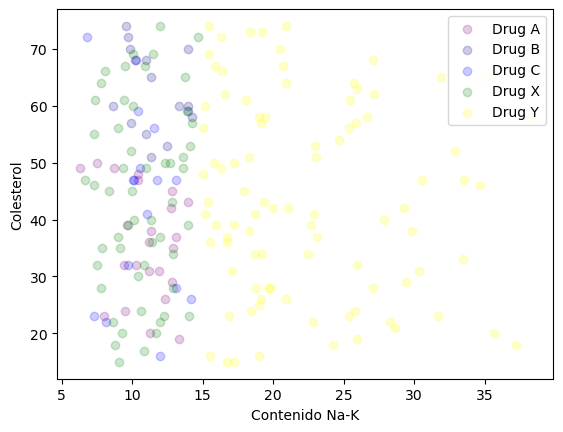

In [128]:
# Diagrama de dispersión
plt.scatter(A.Na_to_K, A.Age, color = "purple", label="Drug A", alpha=0.2)
plt.scatter(B.Na_to_K, B.Age, color = "darkblue", label="Drug B", alpha=0.2)
plt.scatter(C.Na_to_K, C.Age, color = "blue", label="Drug C", alpha=0.2)
plt.scatter(X.Na_to_K, X.Age, color = "green", label="Drug X", alpha=0.2)
plt.scatter(Y.Na_to_K, Y.Age, color = "yellow", label="Drug Y", alpha=0.2)
plt.xlabel("Contenido Na-K")
plt.ylabel("Colesterol")
plt.legend()
plt.show()

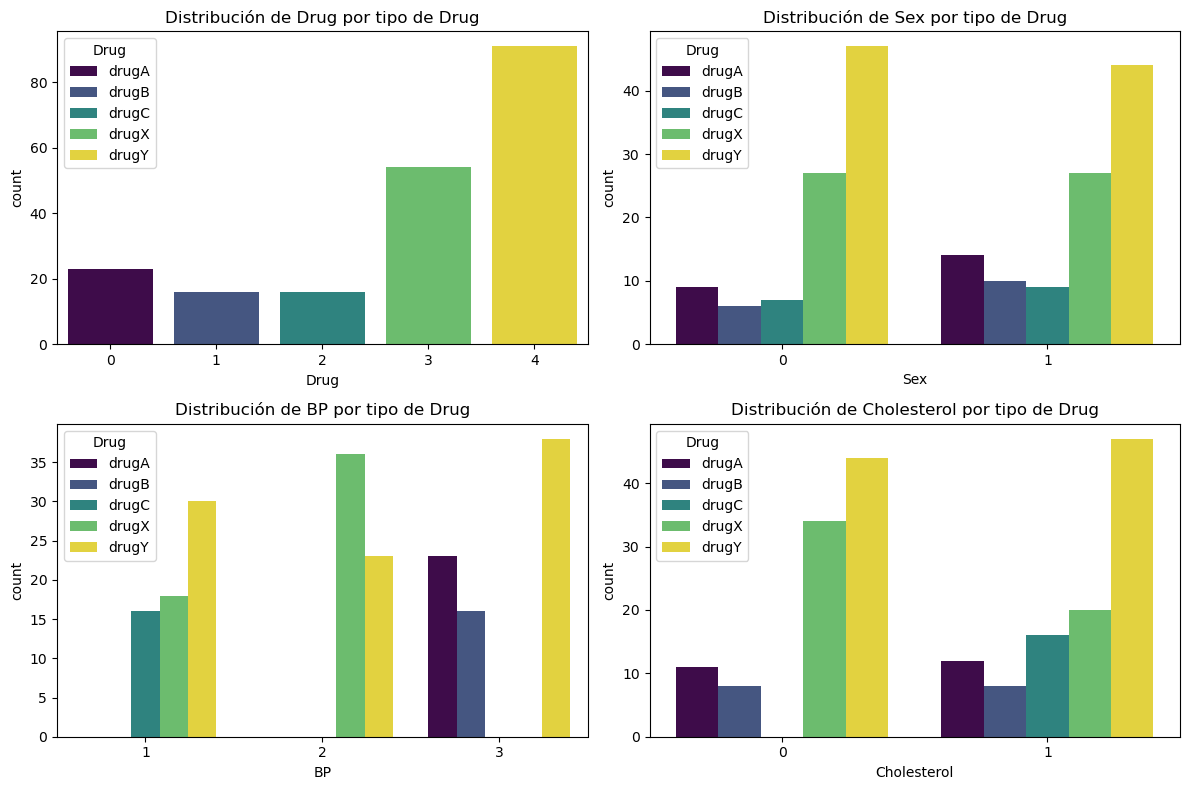

In [122]:
# Gráfica de barras para cada variable categórica
def plot_bar_chart(data, variable, ax):
    sns.countplot(x=variable, hue='Drug', data=data, ax=ax, palette='viridis')
    ax.set_title(f'Distribución de {variable} por tipo de Drug')
    ax.legend(title='Drug', labels=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'])

# Configuración de la figura y ejes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Crear las gráficas
plot_bar_chart(datos, 'Drug', axes[0, 0])
plot_bar_chart(datos, 'Sex', axes[0, 1])
plot_bar_chart(datos, 'BP', axes[1, 0])
plot_bar_chart(datos, 'Cholesterol', axes[1, 1])

plt.tight_layout()
plt.show()


### Análisis Inferencial usando pruebas estadísticas Kruskal-Wallis y Dunn's test
Este código realiza un análisis inferencial en un conjunto de datos (df) para identificar relaciones significativas entre una variable objetivo (target_variable) y otras variables del DataFrame, utilizando dos pruebas estadísticas:

✅ Prueba de Kruskal-Wallis → Para variables numéricas/ordinales.

✅ Prueba de Chi-cuadrado → Para variables categóricas.

Este código permite:

    🔹 Determinar si existen diferencias significativas en variables numéricas/ordinales entre grupos.
    
    🔹 Evaluar si hay asociaciones significativas entre variables categóricas y la variable objetivo.
    
    🔹 Identificar qué grupos específicos presentan diferencias significativas usando la prueba de Dunn.
    
    🔹 Cuantificar la fuerza de asociación en variables categóricas usando Cramér's V.

### Prueba Kruskal-Wallis

El estadístico H en la prueba de Kruskal-Wallis (mide cuánto se desvían las distribuciones de los grupos comparados respecto a la hipótesis nula (que afirma que todas las medianas son iguales).

📊 Criterio para interpretar el estadístico H:
    🔹Valor bajo de H → Las medianas de los grupos son similares, lo que sugiere que no hay diferencias significativas.
    🔹Valor alto de H → Las medianas de los grupos son muy diferentes, lo que sugiere la presencia de diferencias significativas.
    🔹Sin embargo, el valor de H por sí solo no indica si las diferencias son estadísticamente significativas. Para ello se utiliza el p-value asociado.

📊 Criterio para interpretar el resultado

    🔹Si p-value < 0.05 → Se rechaza la hipótesis nula → Hay diferencias significativas entre los grupos.
    🔹Si p-value ≥ 0.05 → No se rechaza la hipótesis nula → No hay diferencias significativas.

### Dunn's Test (Post-Hoc)

🔹 Identifica qué grupos específicos presentan diferencias significativas tras una prueba global como Kruskal-Wallis.

🔹Si Kruskal-Wallis detecta diferencias significativas, se realiza un análisis post-hoc usando la prueba de Dunn con corrección de Bonferroni.

🔹La corrección de Bonferroni controla el error tipo I en comparaciones múltiples.

🔹Esto permite identificar qué grupos específicos presentan diferencias significativas.

### Chi-Square Test
Realiza la prueba de Chi-cuadrado para evaluar si hay una asociación significativa entre cada variable categórica y la variable objetivo. 

Determinar si existen diferencias significativas en variables numéricas/ordinales entre grupos.
    
    ✅ Evaluar si hay asociaciones significativas entre variables categóricas y la variable objetivo.
    ✅ Identificar qué grupos específicos presentan diferencias significativas usando la prueba de Dunn.
    ✅ Cuantificar la fuerza de asociación en variables categóricas usando Cramér's V.

📊 Criterio para interpretar el resultado

    🔹Si el p-value < 0.05, se concluye que hay una asociación significativa.
    🔹En ese caso, se calcula el Cramér's V como una medida de la fuerza de asociación.

In [58]:
# Importar librerías
import scipy.stats as stats
import scikit_posthocs as sp

In [60]:
def inferential_analysis(df, target_variable):
    """
   Realiza pruebas de Kruskal-Wallis y Chi-cuadrado para analizar las relaciones entre la variable objetivo y otras variables del DataFrame.

   Argumentos:
    df: DataFrame de pandas con los datos (ya aumentados y codificados).
    target_variable: Nombre de la columna que contiene la variable objetivo (ordinal).

   Devuelve:
    Ninguno (imprime los resultados de la prueba).
    """

    # --- 1. Kruskal-Wallis (for numerical/ordinal variables) ---
    print("-" * 50)
    print("PRUEBA KRUSKAL-WALLIS")
    print("-" * 50)

    #  Identificar las variables numéricas/ordinales del DataFrame para aplicarles la prueba de Kruskal-Wallis.
    numerical_ordinal_vars = [
        col
        for col in df.columns
        if (
            pd.api.types.is_numeric_dtype(df[col])
            and col != target_variable
            and not col.startswith(("shift_"))
        )
    ]

    
    for variable in numerical_ordinal_vars:
        #  agrupa los datos de cada variable por los niveles de la variable objetivo.
        groups = [
            df[variable][df[target_variable] == level]
            for level in df[target_variable].unique()
        ]

        # Validación de Grupos
        # Si hay menos de dos grupos o algún grupo está vacío, el análisis se detiene para esa variable.
        if len(groups) < 2:
            print(
                f"No se puede realizar prueba Kruskal-Wallis on {variable}: menos de dos grupos."
            )
            continue
        if any(len(group) == 0 for group in groups):
            print(
                f"No se puede realizar prueba Kruskal-Wallis en {variable}: al menos un grupo está vacío."
            )
            continue

        # Cálculo de Kruskal-Wallis
        # La prueba de Kruskal-Wallis se calcula con stats.kruskal(*groups).
        # Se captura cualquier error, como si todos los valores en un grupo son idénticos.
        try:
            statistic, p_value = stats.kruskal(*groups)
        except ValueError as e:
            print(f"Error al realizar la prueba Kruskal-Wallis en {variable}: {e}")
            print("Este error ocurre si los valores de un grupo son idénticos.")
            continue

        print(f"\nKruskal-Wallis: {variable} vs. {target_variable}")
        print(f"  H Statistic: {statistic:.3f}")
        print(f"  p-value: {p_value:.3f}")

        # Interpretación de los resultados
        # Si el valor p (p_value) es menor a 0.05, se concluye que hay diferencias significativas entre los grupos.
        if p_value < 0.05:
            print(
                f"  Resultado: Sí hay diferencias significativas entre los niveles de {target_variable} en la variable {variable}."
            )

            # --- Post-Hoc Tests (Dunn con corrección Bonferroni/Holm) ---
            # Si Kruskal-Wallis detecta diferencias significativas, se realiza un análisis post-hoc usando la prueba de Dunn con corrección de Bonferroni.
            # Esto permite identificar qué grupos específicos presentan diferencias significativas.
            
            #  Prueba de Dunn
            dunn_result = sp.posthoc_dunn(
                a=df,
                val_col=variable,
                group_col=target_variable,
                p_adjust="bonferroni",  # Or 'holm'
            )
            print("\n  Dunn's Test (Post-Hoc):")
            print(dunn_result)

        else:
            print(
                f"  Resultado: No hay diferencias significativas entre niveles de {target_variable} en la variable {variable}."
            )
     # --- 2. Prueba Chi-square (para variables categoricas) ---
    """ Realiza la prueba de Chi-cuadrado para evaluar si hay una asociación significativa entre cada variable categórica y la variable objetivo.
        Si encuentra una relación significativa, calcula el valor de Cramér's V para medir la fuerza de asociación. 
    """
    
    print("\n" + "-" * 50)
    print("PRUEBA CHI-CUADRADA")
    print("-" * 50)

    # 1. Identificar variables categóricas
    categorical_vars = [
        col
        for col in df.columns
        if col
        in (
            "Sex",
            "BP",
            "Cholesterol"
        )
    ]

    for variable in categorical_vars:
        # 2. Creación de la tabla de contingencia
        """Se genera una tabla de frecuencias entre la variable objetivo y la variable categórica usando pd.crosstab()."""
        contingency_table = pd.crosstab(df[target_variable], df[variable])
        print(f"\n Tabla de Contingencia: {target_variable} vs. {variable}")
        print(contingency_table)

        # 3.Cálculo de la prueba Chi-cuadrada
        """ La función stats.chi2_contingency() calcula:
                chi2 → Estadístico de la prueba.
                p_value → Para determinar si hay una relación significativa.
                dof → Grados de libertad.
                expected → Tabla esperada bajo la hipótesis nula."""
        try:
            chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
            print(f"\nChi- cuadrada: {variable} vs. {target_variable}")
            print(f"  Estadística Chi2: {chi2:.3f}")
            print(f"  p-value: {p_value:.3f}")
            print(f"  Grados de libertad: {dof}")

            # 4. Interpretación
            """ Si el p-value < 0.05, se concluye que hay una asociación significativa.
                En ese caso, se calcula el Cramér's V como una medida de la fuerza de asociación."""
            if p_value < 0.05:
                print(
                    f"  Resultado: Sí hay asociación significativa entre {target_variable} and {variable}."
                )
                # Calcular Cramer's V
                n = contingency_table.sum().sum()
                phi2 = chi2 / n
                r, k = contingency_table.shape
                phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
                rcorr = r - ((r - 1) ** 2) / (n - 1)
                kcorr = k - ((k - 1) ** 2) / (n - 1)
                cramers_v = (phi2corr / min((kcorr - 1), (rcorr - 1))) ** 0.5
                print(f"  Cramer's V: {cramers_v:.3f}")

            else:
                print(
                    f"  Resultado: No hay asociación significativa entre {target_variable} and {variable}."
                )

        except ValueError as e:
            print(f"Error al calcular Chi-cuadrada en {variable}: {e}")
            print("Esto ocurre si cualquiera de las frecuencias es cero.")
            continue
    

In [62]:
inferential_analysis(datos, "Drug")

--------------------------------------------------
PRUEBA KRUSKAL-WALLIS
--------------------------------------------------

Kruskal-Wallis: Age vs. Drug
  H Statistic: 26.094
  p-value: 0.000
  Resultado: Sí hay diferencias significativas entre los niveles de Drug en la variable Age.

  Dunn's Test (Post-Hoc):
          0         1         2         3         4
0  1.000000  0.000006  1.000000  0.446832  0.381332
1  0.000006  1.000000  0.005499  0.000779  0.000259
2  1.000000  0.005499  1.000000  1.000000  1.000000
3  0.446832  0.000779  1.000000  1.000000  1.000000
4  0.381332  0.000259  1.000000  1.000000  1.000000

Kruskal-Wallis: Sex vs. Drug
  H Statistic: 2.109
  p-value: 0.716
  Resultado: No hay diferencias significativas entre niveles de Drug en la variable Sex.

Kruskal-Wallis: BP vs. Drug
  H Statistic: 88.115
  p-value: 0.000
  Resultado: Sí hay diferencias significativas entre los niveles de Drug en la variable BP.

  Dunn's Test (Post-Hoc):
              0             1  

### Análisis de correlación de Spearman

Este código realiza un análisis de correlación de Spearman para identificar la relación entre una variable objetivo (target_variable) y otras variables numéricas/ordinales dentro de un DataFrame.

La correlación de Spearman mide la asociación monótona entre dos variables, lo que la hace ideal para:

🔵Variables ordinales.

🔵Relación no lineal pero monótona (cuando una variable sube, la otra también, aunque no sea de forma proporcional).

In [65]:
def analyze_spearman_correlation(df, target_variable):
    """
    Calcula y visualiza las correlaciones de Spearman entre la variable objetivo (ordinal) y otras variables numéricas/ordinales en el DataFrame.

    Argumentos:
    df: DataFrame de pandas con los datos (ya aumentados y codificados).
    target_variable: Nombre de la columna que contiene la variable objetivo (ordinal).

    Devuelve:
    Ninguno (imprime la matriz de correlación y muestra un mapa de calor).
    """

    # Calcular la matriz de correlación de Spearman
    spearman_correlations = df.corr(method="spearman")

    # selecciona solo la columna correspondiente a la variable objetivo en la matriz de correlación.
    # elimina la autocorrelación correlación de la variable consigo misma, que siempre es 1.
    correlations_with_target = spearman_correlations[target_variable].drop(
        target_variable) 

    # Muestra en consola las correlaciones ordenadas de mayor a menor.
    print("Spearman Correlations with", target_variable, ":\n")
    print(correlations_with_target.sort_values(ascending=False))

    # Visualización con Heatmap (Mapa de calor)
    plt.figure(figsize=(12, 10))
    sns.heatmap(spearman_correlations, annot=True, cmap="coolwarm", center=0)
    plt.title("Spearman Correlation Heatmap")
    plt.tight_layout()
    plt.show()

    # Visualización con gráfico de barras con las correlaciones de cada variable con la variable objetivo.
    plt.figure(figsize=(8, 6))
    correlations_with_target.sort_values().plot(kind="barh", color="skyblue")
    plt.title(f"Spearman Correlation with {target_variable}")
    plt.xlabel("Spearman Correlation Coefficient")
    plt.ylabel("Variables")
    plt.tight_layout()
    plt.show()

Spearman Correlations with Drug :

Na_to_K        0.775643
Age           -0.020408
Cholesterol   -0.048022
Sex           -0.091099
BP            -0.171598
Name: Drug, dtype: float64


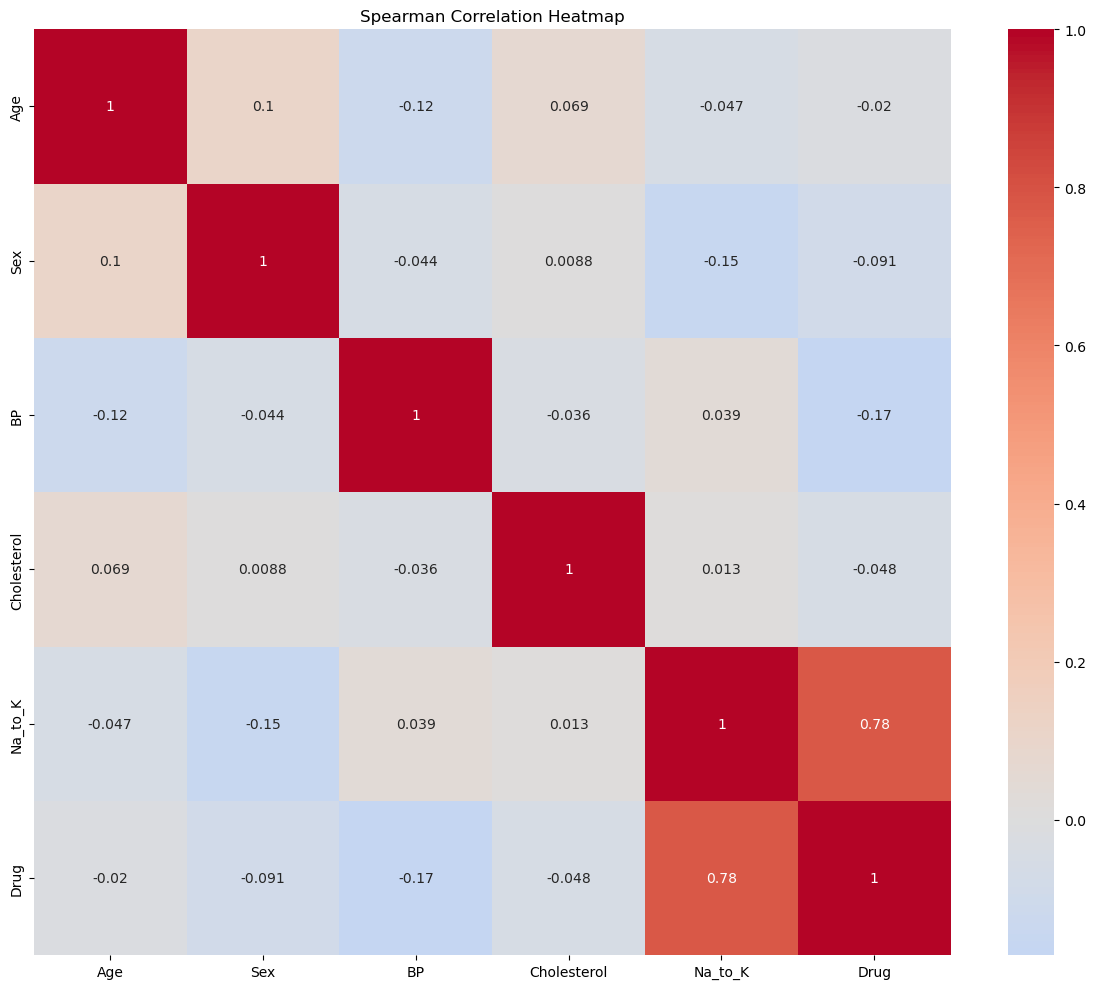

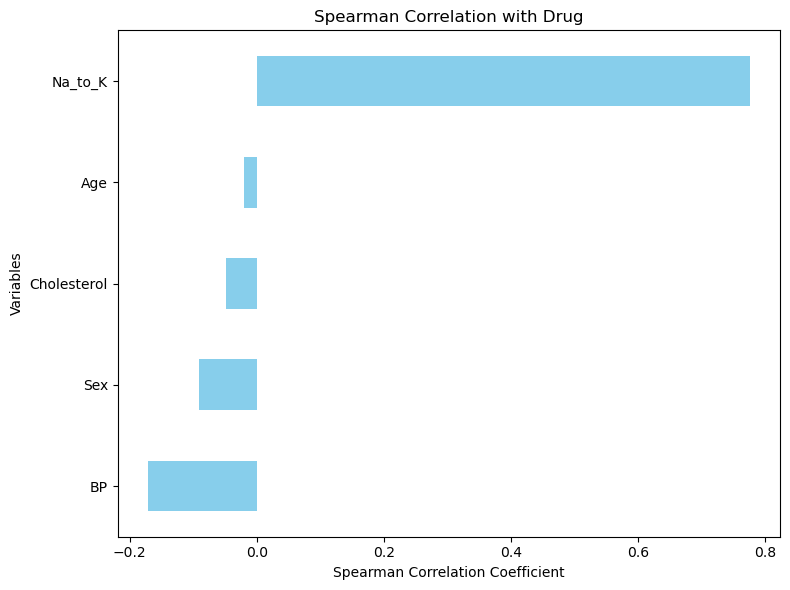

In [67]:
 analyze_spearman_correlation(datos, "Drug")

### Interpretación de resultados Correlación de Spearman
Valores de correlación de Spearman

🔹 Valor +1:	Correlación positiva perfecta (relación monótona directa).

🔹 Valor -1:	Correlación negativa perfecta (relación monótona inversa).

🔹 Cercano a 0:	No hay correlación significativa.

🔵 Na_to_K: 	0.7756	Correlación positiva fuerte. A medida que los niveles de Na_to_K aumentan, es más probable que el medicamento asociado cambie. Parece ser la variable más prometedora para predecir el medicamento.

🔵 Age:	-0.0204	Correlación casi nula. La edad no tiene una relación significativa con el tipo de medicamento.

🔵 Cholesterol:	-0.0480	Correlación débil negativa. No hay una relación significativa entre el colesterol y el medicamento.

🔵 Sex:	-0.0911	Correlación débil negativa. El sexo tiene muy poca influencia en el tipo de medicamento.

🔵 BP:	-0.1716	Correlación débil negativa. Aunque hay una ligera tendencia, la relación entre la presión arterial y el medicamento no es fuerte.

## Selección de características

In [72]:
# Separar las variables: X = variables independientes, 
#Y= variables dependientes objetivo Drugs

X = datos.drop('Drug', axis=1)
y = datos['Drug']

In [74]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,3,1,25.355
1,47,1,1,1,13.093
2,47,1,1,1,10.114
3,28,0,2,1,7.798
4,61,0,1,1,18.043
...,...,...,...,...,...
195,56,0,1,1,11.567
196,16,1,1,1,12.006
197,52,1,2,1,9.894
198,23,1,2,0,14.020


In [76]:
y

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int64

In [78]:
# Creación de las bases de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

## Modelo de árbol de decisón

In [81]:
# Crear objeto de clasificación del árbol de decisión
clf = DecisionTreeClassifier(criterion = "gini")

# Aplicar el algoritmo de árboles de decisión a los grupos de entrenamiento
clf = clf.fit(X_train, y_train)

# Predicción de la respuesta para el grupo de prueba
y_pred = clf.predict(X_test)

Las reglas del árbol se construyen basándose en divisiones binarias de las características de los datos para maximizar la pureza de los nodos, utilizando el criterio de Gini en cada división para decidir el mejor punto de corte.

In [86]:
# Estadísticas de desempeño
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## Optimización del desempeño del árbol de decisión

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score

# 1. Configurar los hiperparámetros a optimizar
#  Define el conjunto de hiperparámetros que se evaluarán para encontrar la mejor combinación.
param_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'class_weight':['balanced'],                # Corrige el impacto del desequilibrio de clases, mejora el recall(sensibilidad) de la clase minoritaria.
    'max_depth': [2, 3, 5, 10, None],           # Controla la profundidad del árbol
    'min_samples_split': [2, 5, 10],            # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],              # Mínimo de muestras en cada hoja
    'ccp_alpha': [0.0, 0.01, 0.1, 0.5,0.8,1.0]  # Controla la poda del árbol, lo que ayuda a simplificar el modelo y reducir el sobreajuste
}

# 2. Implementar GridSearchCV para encontrar los mejores parámetros
# Permite probar todas las combinaciones de parámetros en la cuadrícula, utilizando validación cruzada para reducir el riesgo de sobreajuste.
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 3. Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# 4. Validación cruzada para evaluar la generalización
#  Evalúa el modelo con validación cruzada, brindando una métrica más confiable del rendimiento.
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean():.4f}")

# 5. Predicciones y evaluación del modelo
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

print(best_model.get_params())

Cross-validation accuracy: 0.9938
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


Parámetros del modelo
🔹 ccp_alpha: 0.0
Controla la poda del árbol utilizando el parámetro de coste-complejidad.
Un valor de 0.0 significa que no se aplicará poda, permitiendo que el árbol crezca según los demás parámetros.


🔹 class_weight: 'balanced'
Ajusta automáticamente el peso de cada clase para compensar desequilibrios en los datos.
Es útil cuando tienes una clase minoritaria que deseas que tenga mayor influencia en el modelo.
criterion: 'gini'

🔹 criterion: 'gini'
El criterio Gini mide la impureza de una partición, donde valores más bajos indican particiones más puras.

🔹 max_depth: 5
Limita la profundidad máxima del árbol.
Este valor previene el sobreajuste, ya que un árbol demasiado profundo puede memorizar el conjunto de entrenamiento en lugar de generalizar.

🔹 max_features: None
No se limita el número de características consideradas en cada división. Esto significa que el modelo usará todas las características disponibles, lo que puede generar un árbol más complejo pero también más preciso.

🔹 max_leaf_nodes: None
No se establece un límite en el número máximo de nodos hoja. Permite que el árbol crezca según otros parámetros como max_depth.

🔹 min_impurity_decrease: 0.0
No se requiere una mejora mínima en la impureza para permitir una división.
Un valor mayor que 0 puede ayudar a evitar divisiones irrelevantes.

🔹 min_samples_leaf: 1
Cada hoja del árbol debe contener al menos 1 muestra.
Esto permite que el árbol se ramifique libremente, pero puede hacerlo más susceptible al sobreajuste.

🔹 min_samples_split: 2
El número mínimo de muestras requerido para dividir un nodo es 2.
Es el valor predeterminado y permite que el árbol crezca hasta que se cumplan otros límites (como max_depth).

🔹 min_weight_fraction_leaf: 0.0
Establece la fracción mínima del peso total de las muestras que debe tener cada hoja.
Con 0.0 se desactiva esta restricción.

🔹 monotonic_cst: None
Indica si se deben imponer restricciones monótonas en las características.
None significa que no se aplican restricciones.

🔹 random_state: 42
Fija la semilla del generador aleatorio para garantizar la reproducibilidad de los resultados.

🔹 splitter: 'best'
Indica que se seleccionará la mejor división posible en cada nodo (basada en el criterio gini).

### Matríz de Confusión 

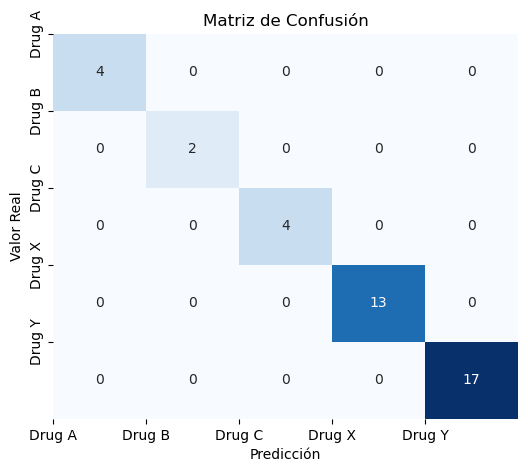

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, best_model.predict(X_test))

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Etiquetas de los ejes
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')

# Etiquetas personalizadas según el número de clases
class_labels = ['Drug A', 'Drug B', 'Drug C', 'Drug X', 'Drug Y']
plt.xticks(ticks=range(len(class_labels)), labels=class_labels)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels)

plt.show()

# mapping = {'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4} 

### Visualización del árbol de decisión optimizado

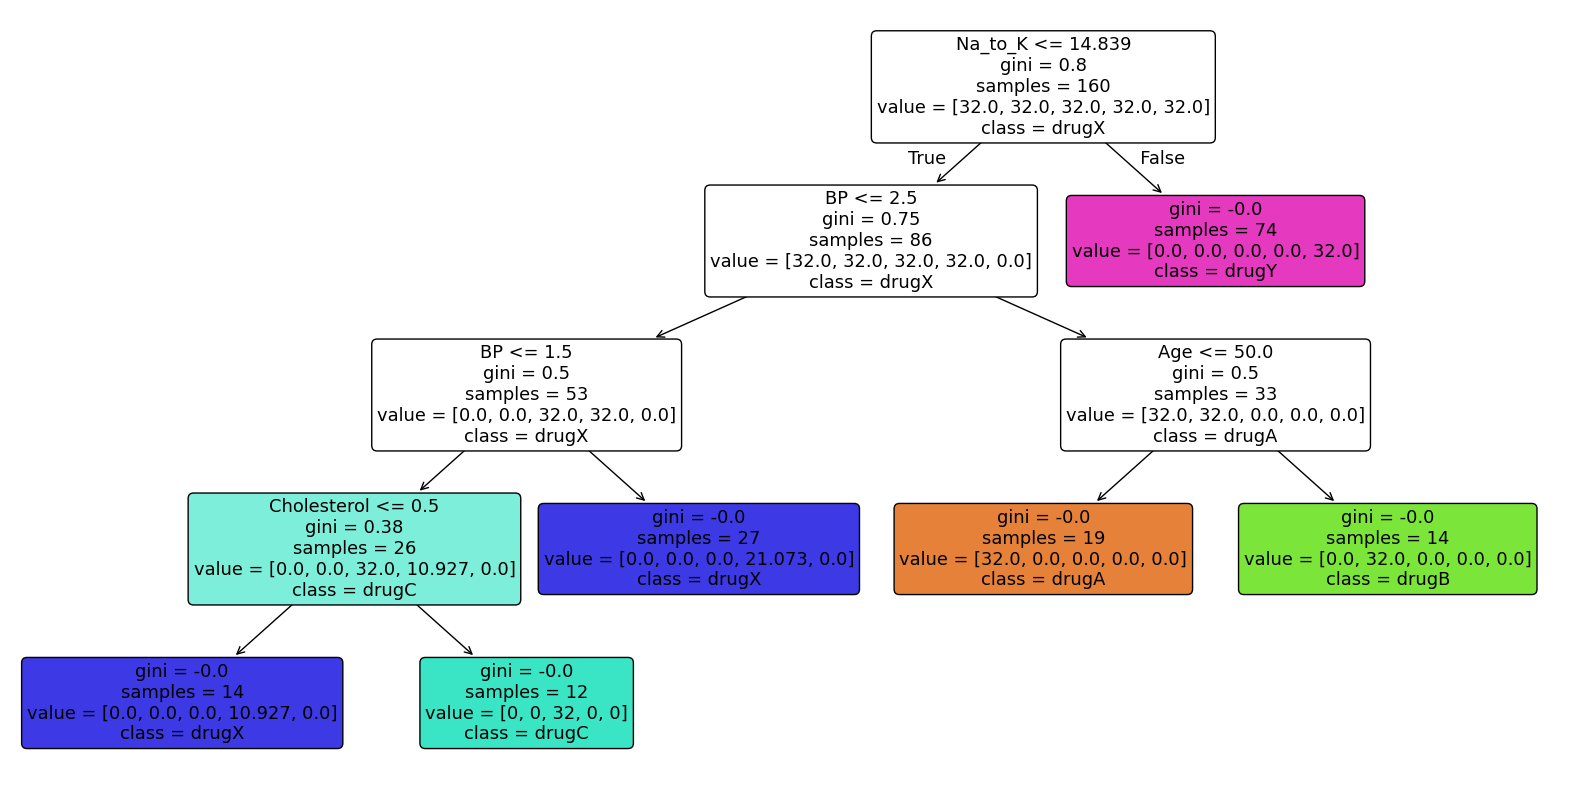

In [122]:
#  Visualiza el árbol
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names= X.columns.tolist(), 
          class_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], rounded=True)
plt.show()

Cada nodo de decisión muestra:

    🔹La condición que se utiliza para dividir los datos (e.g., Na_to_K <= 14.839).
    🔹El valor de Gini, que indica la pureza del nodo (valores bajos representan mayor pureza).
    🔹El número de muestras que caen en ese nodo.
    🔹La distribución de las muestras entre las diferentes clases.
    🔹La clase asignada en ese nodo si se trata de una hoja.


Esta representación visual 📈 ayuda a comprender cómo el modelo toma decisiones para clasificar los pacientes 🧑🏼‍⚕️ en diferentes categorías de fármacos 💊 basándose en sus características.


## Predicción de nuevo paciente

In [124]:
import numpy as np

# Características del nuevo paciente
nuevo_paciente = np.array([[50, 0, 3, 0, 15.302]])  # Usar valores numéricos en lugar de categóricos

# Descripción de los valores:
# 1. Edad: 50 (valor numérico)
# 2. Sexo: F (0 para Female, 1 para Male)
# 3. BP: high (3 para high, 2 para normal, 1 para low)
# 4. Cholesterol: normal (0 para normal, 1 para high)
# 5. Na_to_K: 15.302 (valor numérico)

# Realizar la predicción usando el modelo entrenado
prediccion = best_model.predict(nuevo_paciente)

# Mostrar la predicción
print(f'La clase pronosticada para el nuevo paciente es: {prediccion[0]}')


La clase pronosticada para el nuevo paciente es: 4


⭐ La clase 4 corresponde al fármaco internacional 'drugY' ⭐

Fin 🤓